CS-GY 6313 / CUSP-GX 6006: Data Visualiza
tion- Spring ’24

 Homework #1

Part A: Matrix Transformations (5 points):

 We have a point rendered (3,4). We have to rotate this around the origin by
 30 degrees counterclockwise, then translate it 3 units rightward and 2 units
 downward. How can we do this using matrix transformation and homogeneous
 coordinates?
 Task: Transform this point based on the instructions above. Use a singular
 matrix transformation for this task. Report the new coordinates.
 Grading Metric: We’ll run the code to check if the matrix transformation was
 correct and was performed with one matrix transformation.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Define the rotation angle in radians (30 degrees)
theta = np.deg2rad(30)

# Define the rotation matrix
R = np.array([
    [np.cos(theta), -np.sin(theta), 0],
    [np.sin(theta), np.cos(theta), 0],
    [0, 0, 1]
])

# Define the translation matrix
T = np.array([
    [1, 0, 3],
    [0, 1, -2],
    [0, 0, 1]
])

# Define the point to be transformed
point = np.array([3, 4, 1])

# Apply the rotation followed by translation
transformed_point = np.dot(T, np.dot(R, point))

# Extract the transformed coordinates
x_new, y_new, _ = transformed_point

print("New coordinates after transformation:")
print(f"x' = {x_new:.3f}, y' = {y_new:.3f}")

New coordinates after transformation:
x' = 3.598, y' = 2.964


Part B: Color Map (10 points):

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import pandas as pd

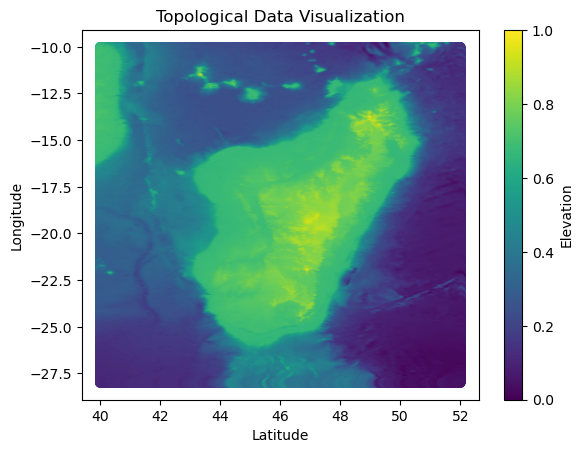

In [4]:
# Define column names
columns = ['Latitude', 'Longitude', 'Elevation']

# Read the CSV file directly using Pandas with specified column names
df = pd.read_csv('height.csv', header=None, names=columns, delim_whitespace=True)

# Extract data from DataFrame
x = df['Latitude'].values
y = df['Longitude'].values
z = df['Elevation'].values

# Define color map function
def color_map(elevations):
    cmap = plt.get_cmap('viridis')  # Choose colormap
    norm = colors.Normalize(vmin=np.min(elevations), vmax=np.max(elevations))  # Normalize elevations
    colors_array = cmap(norm(elevations))  # Map elevations to colors using the colormap
    return colors_array  # Return RGBA values directly without scaling to [0, 1]

# Create scatter plot
plt.scatter(x, y, c=color_map(z))
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Topological Data Visualization')
plt.colorbar(label='Elevation')
plt.show()

BONUS QUESTION: Color Frequency Analysis with
 Fourier Transforms (2 points):

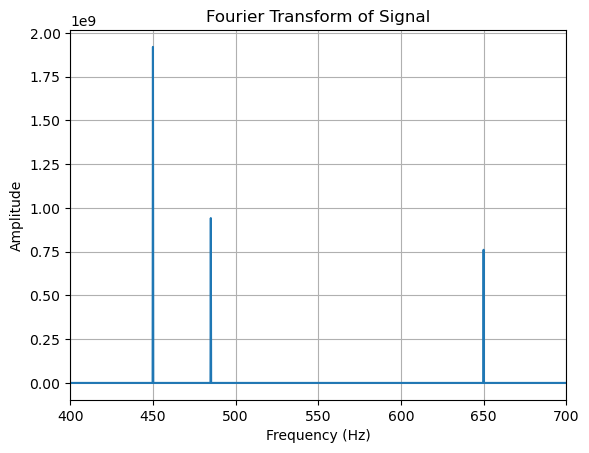

Frequencies of the three colors: [650. 485. 450.]


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

def fourier_transform(signal_path):
    # Read the signal
    sample_rate, signal = wavfile.read(signal_path)
    
    # Perform Fourier Transform
    n = len(signal)
    freq = np.fft.rfftfreq(n, d=1/sample_rate)
    fft_values = np.abs(np.fft.rfft(signal))

    return freq, fft_values

# Path to the signal (update the path if necessary)
signal_path = 'signal.wav'

# Perform Fourier Transform
freq, fft_values = fourier_transform(signal_path)

# Plot the Fourier Transform
plt.plot(freq, fft_values)
plt.xlim(400, 700)  # Limit x-axis to visible spectrum (400Hz to 700Hz)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Fourier Transform of Signal')
plt.grid(True)
plt.show()

# Identify frequencies corresponding to the colors
peak_indices = np.argsort(fft_values)[-3:]  # Indices of top 3 peaks
color_frequencies = freq[peak_indices]
print("Frequencies of the three colors:", color_frequencies)